<a href="https://colab.research.google.com/github/MorawoLekanDavid/ML_projects/blob/main/heartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = 'https://raw.githubusercontent.com/MorawoLekanDavid/ML_projects/main/datasets/heart.csv'
df = pd.read_csv(dataset)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [56]:
categorical_data = df.select_dtypes(include=['object'])
categorical_data

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


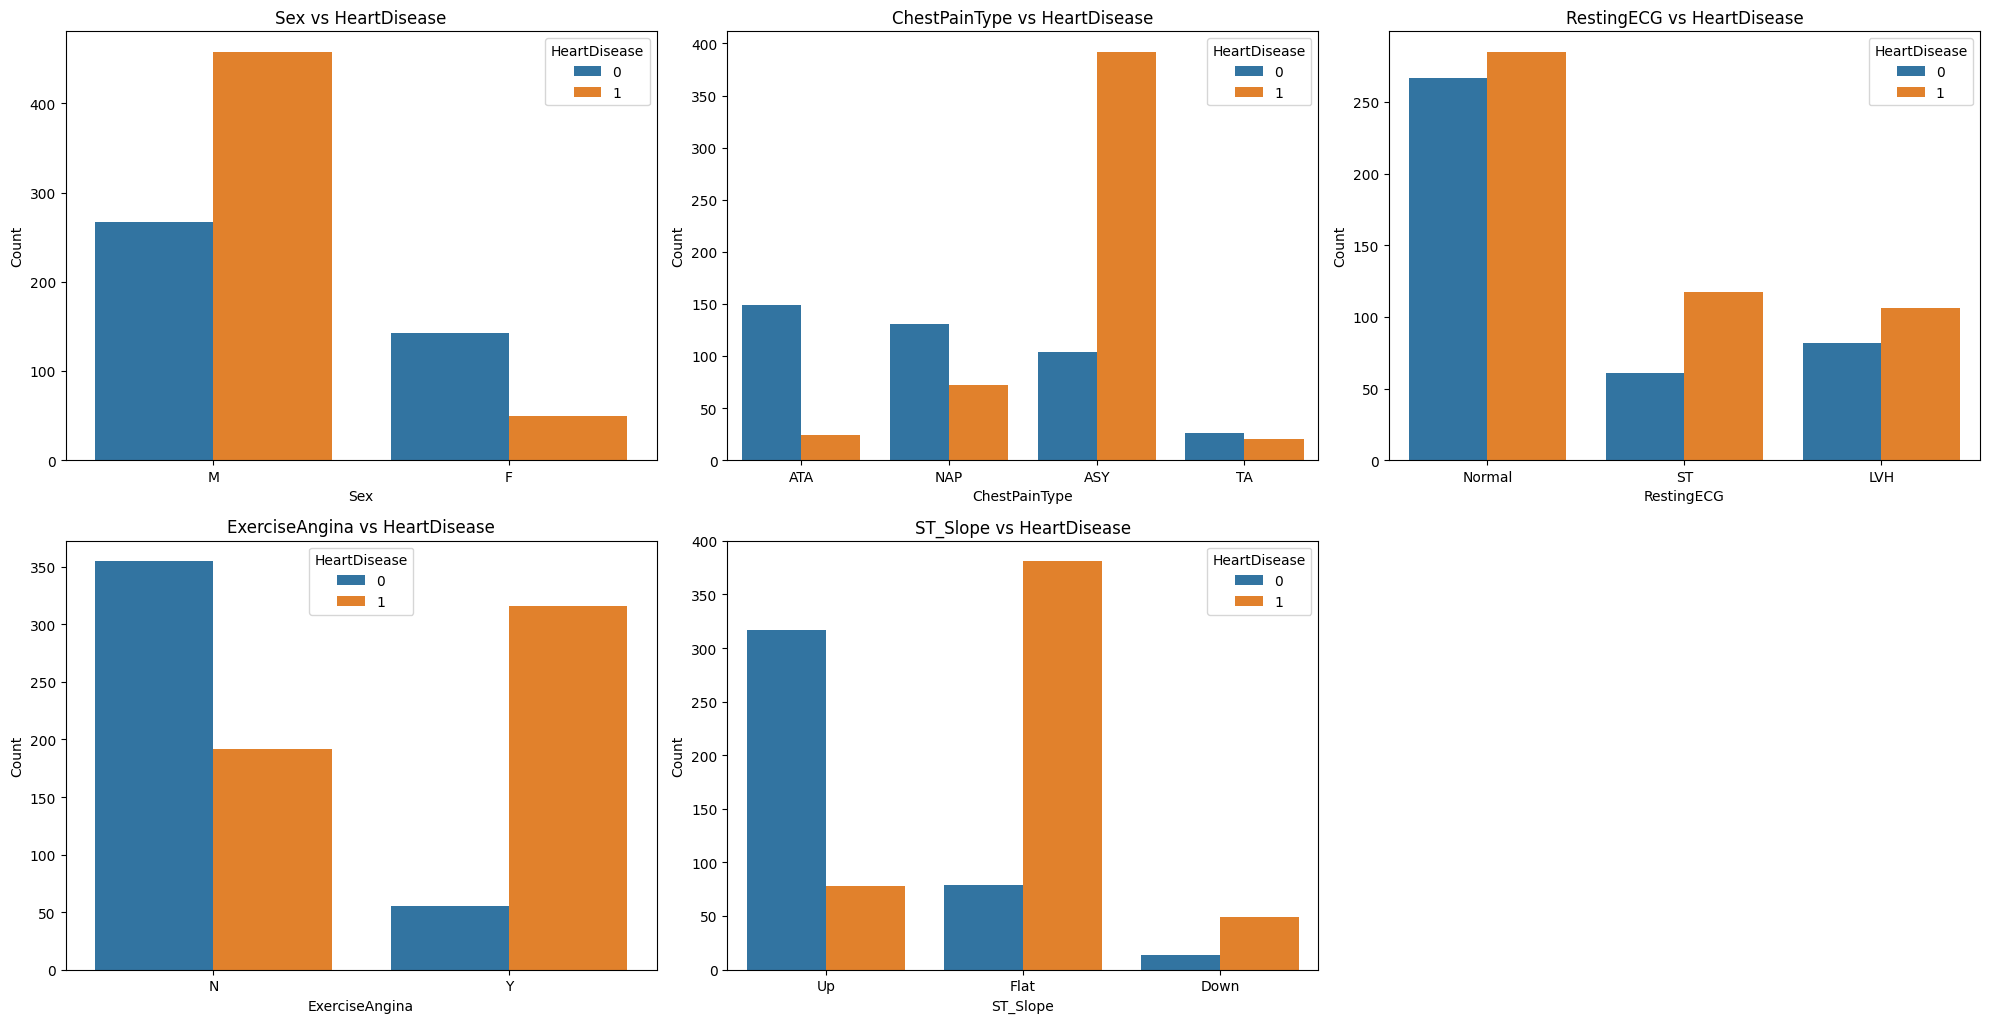

In [57]:
# We visualize each categorical variable with HeartDisease
plt.figure(figsize=(20, 15))

for i, feature in enumerate(categorical_data, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=feature, hue='HeartDisease')
    plt.title(f'{feature} vs HeartDisease')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

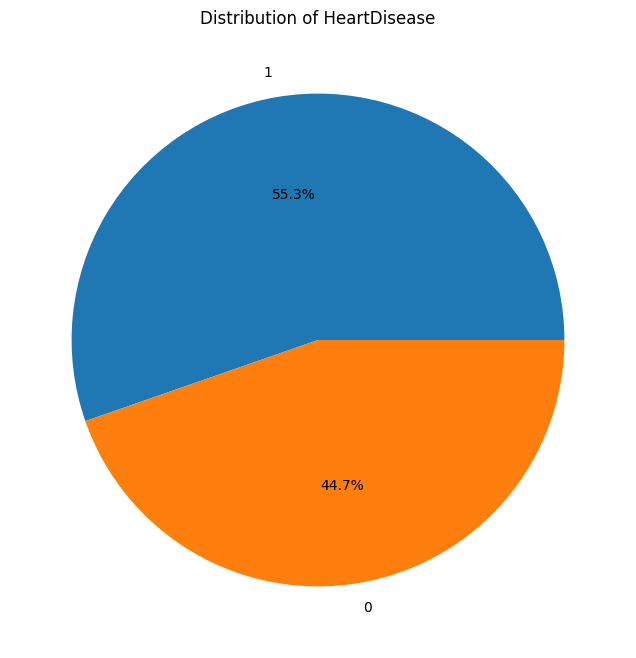

In [58]:
plt.figure(figsize=(8, 8))
df['HeartDisease'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.title('Distribution of HeartDisease')
plt.ylabel('')
plt.show()

In [59]:
categorical_analysis = {}

for feature in categorical_data:
    cross_tab = pd.crosstab(df[feature], df['HeartDisease'], normalize='index')
    categorical_analysis[feature] = cross_tab


# Let's convert the analysis results of categorical variables into a DataFrame
categorical_analysis_df = pd.concat(categorical_analysis.values(), keys=categorical_analysis.keys())
categorical_analysis_df

HeartDisease                  0         1
Sex            F       0.740933  0.259067
               M       0.368276  0.631724
ChestPainType  ASY     0.209677  0.790323
               ATA     0.861272  0.138728
               NAP     0.645320  0.354680
               TA      0.565217  0.434783
RestingECG     LVH     0.436170  0.563830
               Normal  0.483696  0.516304
               ST      0.342697  0.657303
ExerciseAngina N       0.648995  0.351005
               Y       0.148248  0.851752
ST_Slope       Down    0.222222  0.777778
               Flat    0.171739  0.828261
               Up      0.802532  0.197468

categorical distributions are generally neither good nor bad, of course our data is insufficient, which is one reason for this There are factors that will reduce our accuracy rate in model building and later, or situations that may have bias. We can use class weighting, sampling techniques or more advanced modeling methods to avoid these situations. Keep in mind

Sex:
26% of women have heart disease. 63% of men have heart disease.

ChestPainType:
79% of those who are asymptomatic (ASY) have heart disease. 14% of those with atypical angina (ATA) have heart disease. 35% of those with non-anginal pain (NAP) have heart disease. 43% of those with typical angina (TA) have heart disease.

FastingBS (Fasting Blood Sugar):
48% of patients with fasting blood sugar below 120 mg/dl have heart disease. 79% of patients with fasting blood sugar above 120 mg/dl have heart disease.

RestingECG (Resting ECG Results):
56% of patients with left ventricular hypertrophy (LVH) have heart disease. 52% of patients with normal ECG results have heart disease. 66% of patients with ST-T wave abnormalities have heart disease.

ExerciseAngina (Exercise-Triggered Angina):
35% of patients without exercise-induced angina have heart disease. 85% of patients with exercise-induced angina have heart disease.

ST_Slope (ST Segment Slope):
78% of patients with downsloping ST segment have heart disease. 83% of patients with a flat-sloping ST segment have heart disease. 20% of patients with an upward-sloping ST segment have heart disease.

In [60]:
num_data = df.select_dtypes(include=['float64','int64'])
num_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [61]:
num_data.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


There is a positive correlation between Age and HeartDisease (0.28). In other words, the risk of heart disease increases as age increases.

There is a weak positive correlation between RestingBP and HeartDisease (0.11).

There is a weak negative correlation between Cholesterol and HeartDisease (-0.23).

There is a moderate negative correlation between MaxHR and HeartDisease (-0.40). This indicates that individuals with higher maximum heart rates may have a lower risk of heart disease.

There is a moderate positive correlation between Oldpeak and HeartDisease (0.40). This indicates that the risk of heart disease may increase if ST segment depression is higher.


In [62]:
num_corr = num_data.corr()
num_corr['HeartDisease'].sort_values(ascending = False)

,HeartDisease
HeartDisease,1.000000
Oldpeak,0.403951
Age,0.282039
FastingBS,0.267291
RestingBP,0.107589
Cholesterol,-0.232741
MaxHR,-0.400421


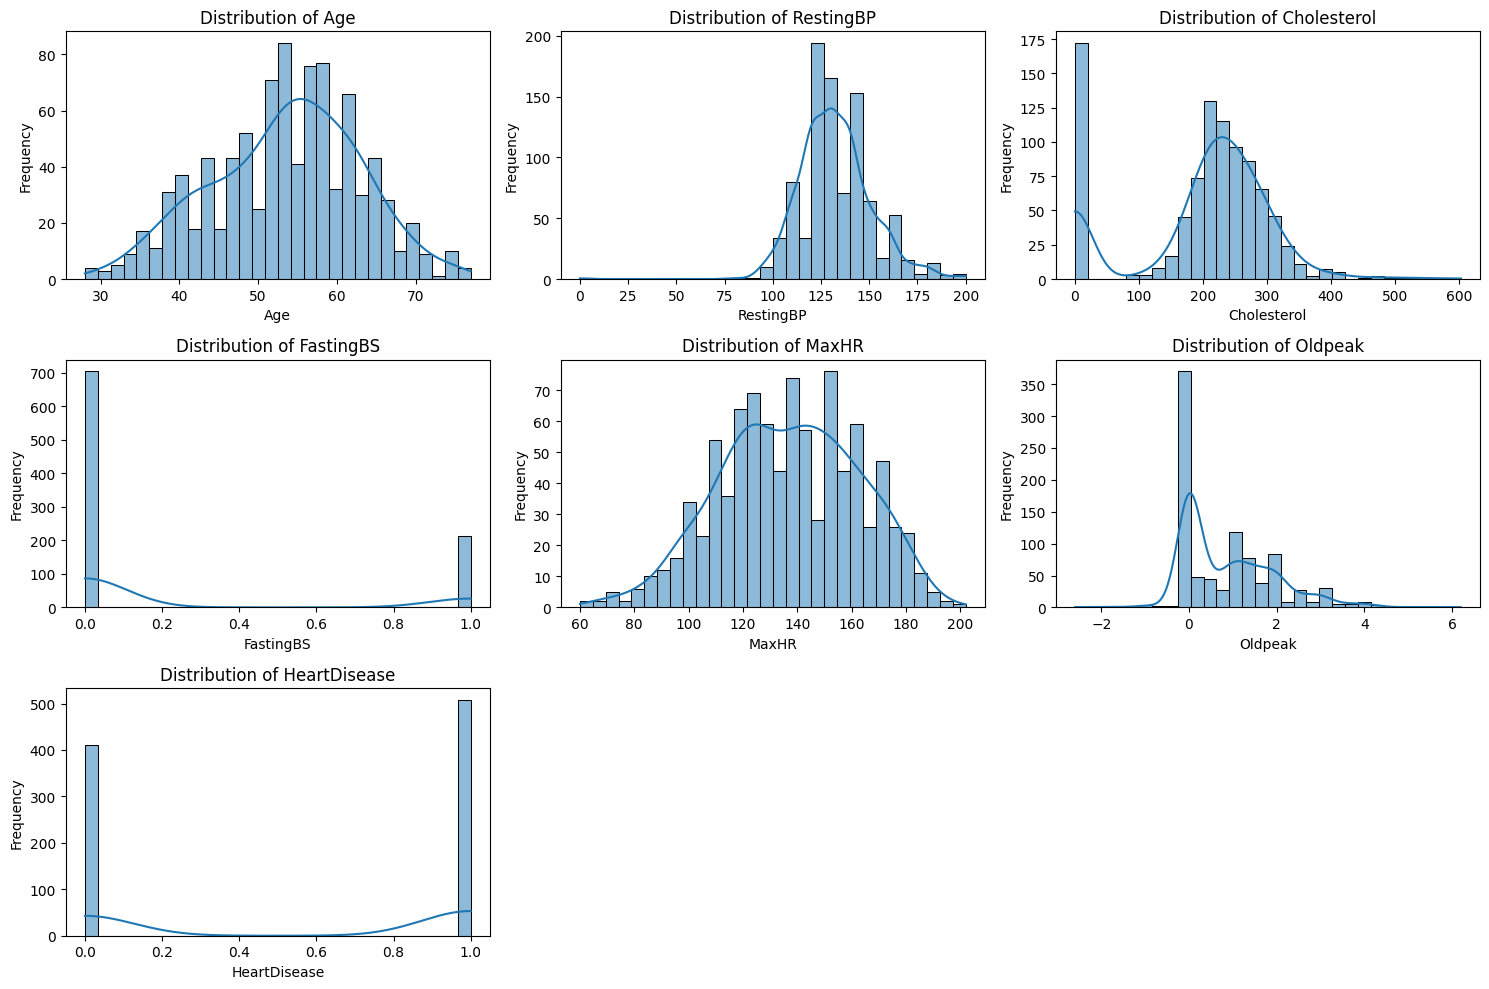

In [63]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [64]:
#from scipy import stats
#import numpy as np
#z_scores = np.abs(stats.zscore(num_data))  # Replace df with your DataFrame
#outliers = np.where(z_scores > 3)  # Index of outliers
#print(outliers)

In [65]:
#filtering outliers retaining only those data points which are below data threshold
# this is a way to remove the outlier from a dataset.
#but since our dataset is not much remove any entry will affect the data. so we use simpleimputer to fill the data
#num_data = num_data[(z_scores < 3).all(axis=1)]

In [66]:
#np.where((z_scores > 3), num_data.median(), num_data)

In [67]:
df.select_dtypes(include=['object']).columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [68]:
X = df.drop(columns='HeartDisease', axis=1)
y = df['HeartDisease']

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, stratify =  y , random_state = 42)


In [70]:
# Using custom transformer to detect outliers and replace the outliers with the median
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats
import numpy as np

# Custom transformer to replace outliers with the median
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, factor=3):  # Factor defines the boundary of the outlier on Z-table
        self.factor = factor

    def fit(self, X, y=None):
        # Compute the median for each feature
        self.median_ = np.median(X, axis=0)
        return self

    def transform(self, X):
        z_scores = np.abs(stats.zscore(X))  # Replace df with your DataFrame
        X_out = np.where((z_scores > self.factor), self.median_, X)
        return X_out

In [71]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(OutlierRemover(), SimpleImputer(strategy='median'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'),OneHotEncoder(handle_unknown = "ignore"))

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_columns = df.select_dtypes(include=['object']).columns
num_columns = df.select_dtypes(include=['int64','float64']).columns.drop('HeartDisease', errors = 'ignore')
preprocessor = ColumnTransformer(
    transformers= [
    ('cat', cat_pipeline, cat_columns),
    ('num',num_pipeline,num_columns)
  ]
)
X_train_encoded = preprocessor.fit_transform(X_train)

In [73]:
num_feature_names = num_columns
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehotencoder'].get_feature_names_out(cat_columns)
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# Creating the DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=all_feature_names, index=X_train.index)

# Check the transformed DataFrame
X_train_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
485,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.970012,0.389832,0.143311,1.835497,-0.324520,0.359374
486,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.122028,-1.305012,0.114958,1.835497,1.689837,-0.441174
117,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.546020,-0.136154,1.286891,1.835497,-0.247045,0.659580
361,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.725956,1.617132,-1.907572,-0.544812,-0.479470,-0.841449
296,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.407962,0.740489,-1.907572,1.835497,0.101594,-0.140969


In [90]:
from scipy.stats import randint, uniform

cv_folds = 5
n_iter_search = 20

# Define hyperparameter space for SVC
svc_param_distributions = {
    'C': [0.1, 1, 10, 100, 1000],  # C can be any float from 0.1 to 10
    'kernel': ['linear', 'rbf'],
    'gamma': [1e-3, 1e-4, 'scale', 'auto'],  # Kernel coefficient
}

# Define hyperparameter space for SGDClassifier
sgd_param_distributions = {
    'loss': ['hinge', 'log_loss'],
    'penalty': ['l2', 'l1'],
    'alpha': uniform(0.0001, 0.1),  # Regularization strength
    'max_iter': randint(100, 2000)
}

# Define hyperparameter space for RandomForestClassifier
rf_param_distributions = {
    'n_estimators': randint(50, 200),  # Number of trees
    'max_depth': randint(5, 50),  # Maximum depth of trees
    'bootstrap': [True, False],  # Whether to use bootstrap samples
}



In [91]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
# Define your models
models = {
    'sgd_clf': SGDClassifier(),
    'svc': SVC(),
    'rnd_forest': RandomForestClassifier()
}
param_distributions = {
    'sgd_clf': sgd_param_distributions,
    'svc': svc_param_distributions,
    'rnd_forest': rf_param_distributions
}

Training sgd_clf...
Best parameters for sgd_clf: {'alpha': 0.0685233026512157, 'loss': 'hinge', 'max_iter': 1055, 'penalty': 'l2'}

Cross-validation accuracy scores for sgd_clf: [0.89795918 0.86394558 0.84353741 0.85034014 0.82876712]
Mean cross-validation accuracy for sgd_clf: 0.8569098872425682



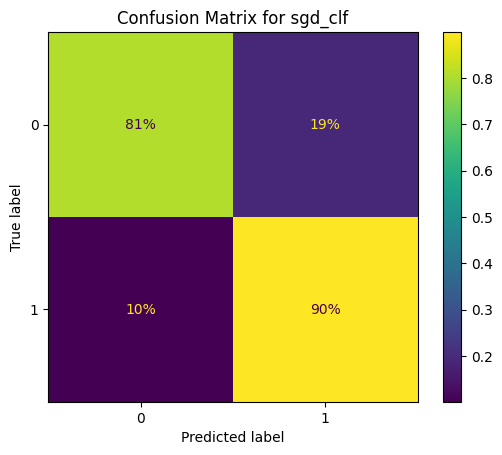

Training svc...
Best parameters for svc: {'kernel': 'rbf', 'gamma': 'auto', 'C': 1}

Cross-validation accuracy scores for svc: [0.87755102 0.88435374 0.87755102 0.85034014 0.82876712]
Mean cross-validation accuracy for svc: 0.8637126083310036



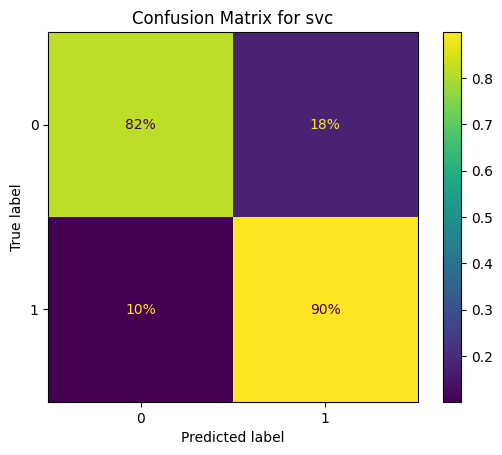

Training rnd_forest...
Best parameters for rnd_forest: {'bootstrap': True, 'max_depth': 28, 'n_estimators': 166}

Cross-validation accuracy scores for rnd_forest: [0.89795918 0.85034014 0.87755102 0.84353741 0.82191781]
Mean cross-validation accuracy for rnd_forest: 0.8582611126642437



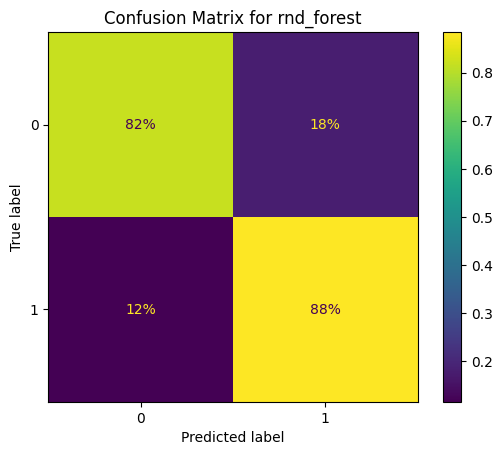

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,roc_auc_score,ConfusionMatrixDisplay
#randomized search

# Iterate over each model, create a pipeline, and evaluate
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Create a pipeline with the preprocessing and the model
    full_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    model_random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions[model_name],
    n_iter=n_iter_search,
    cv=cv_folds,
    random_state=42
)

    # Fit the RandomizedSearchCV
    model_random_search.fit(X_train_encoded, y_train)

    # Output best parameters for the model
    print(f"Best parameters for {model_name}: {model_random_search.best_params_}\n")
    # Get the best model
    best_model = model_random_search.best_estimator_

    # Perform cross-validation on the best model
    cv_scores = cross_val_score(best_model, X_train_encoded, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation accuracy scores for {model_name}: {cv_scores}")
    print(f"Mean cross-validation accuracy for {model_name}: {cv_scores.mean()}\n")
    # Predict on the test set using the best model
    y_train_pred = cross_val_predict(best_model, X_train_encoded, y_train, cv=5)
     # Display the confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


In [ ]:
 # Check accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy for {model_name}: {test_accuracy}\n")